## MLB Analysis

This project will be an application of concepts learned through the Regis MSDS program. I'll be conducting an analysis on player performance and team performance that will be comprised of exploratory data analysis, machine learning, data visualization, and predictive modeling. The dataset was taken from Kaggle and more specifically Open Source Sports which has a fair amount of sports related datasets. The features of the dataset can be seen here: https://www.kaggle.com/open-source-sports/baseball-databank.

Some of the key questions that I'll be trying to answer throughout the course of this project are:

* Which attributes of a player are most valuable for each position?
* How are some statistics in the batting table related to each other? Is batting average a good predictor for power? Is runs?
* Can we predict the number of wins a pitcher can have based on other metrics?
* What are the most common statistical features?
* What are the statistics most valuable to building a winning team?
* What what kind of players make All Star games and the Hall of Fame?

### Import Packages

In [121]:
# Packages for Data Analysis and Data Wrangling

import pandas as pd
import numpy as np
import random as rnd

In [122]:
# Packages for Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
# Machine Learning Packages

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [124]:
import warnings
warnings.filterwarnings("ignore")

### Import Data

In [125]:
batting = pd.read_csv("/Users/drewsdesktop/Desktop/Data Science/Regis Classes/MSDS 692- Practicum/Datasets/Baseball Databank/Batting.csv")
pitching = pd.read_csv("/Users/drewsdesktop/Desktop/Data Science/Regis Classes/MSDS 692- Practicum/Datasets/Baseball Databank/Pitching.csv")
all_star = pd.read_csv("/Users/drewsdesktop/Desktop/Data Science/Regis Classes/MSDS 692- Practicum/Datasets/Baseball Databank/AllstarFull.csv")
master = pd.read_csv("/Users/drewsdesktop/Desktop/Data Science/Regis Classes/MSDS 692- Practicum/Datasets/Baseball Databank/Master.csv")
team = pd.read_csv("/Users/drewsdesktop/Desktop/Data Science/Regis Classes/MSDS 692- Practicum/Datasets/Baseball Databank/Teams.csv")
hof = pd.read_csv("/Users/drewsdesktop/Desktop/Data Science/Regis Classes/MSDS 692- Practicum/Datasets/Baseball Databank/HallOfFame.csv")

### Batting Data

This information will be used to determine whether or not position players have the statistics required to be an All Star or HOF player. 

In [126]:
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [127]:
batting.tail()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
101327,zitoba01,2015,1,OAK,AL,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101328,zobribe01,2015,1,OAK,AL,67,235.0,39.0,63.0,20.0,...,33.0,1.0,1.0,33.0,26.0,2.0,0.0,0.0,3.0,5.0
101329,zobribe01,2015,2,KCA,AL,59,232.0,37.0,66.0,16.0,...,23.0,2.0,3.0,29.0,30.0,1.0,1.0,0.0,2.0,3.0
101330,zuninmi01,2015,1,SEA,AL,112,350.0,28.0,61.0,11.0,...,28.0,0.0,1.0,21.0,132.0,0.0,5.0,8.0,2.0,6.0
101331,zychto01,2015,1,SEA,AL,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The first, I notice is that there are quite a few null values. Mainly in the following columns:
* lgID, IBB, HBP, SH, SF, GIDP

In [128]:
# General overview of null values, value type, column names. 
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101332 entries, 0 to 101331
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   playerID  101332 non-null  object 
 1   yearID    101332 non-null  int64  
 2   stint     101332 non-null  int64  
 3   teamID    101332 non-null  object 
 4   lgID      100595 non-null  object 
 5   G         101332 non-null  int64  
 6   AB        96183 non-null   float64
 7   R         96183 non-null   float64
 8   H         96183 non-null   float64
 9   2B        96183 non-null   float64
 10  3B        96183 non-null   float64
 11  HR        96183 non-null   float64
 12  RBI       95759 non-null   float64
 13  SB        94883 non-null   float64
 14  CS        72729 non-null   float64
 15  BB        96183 non-null   float64
 16  SO        88345 non-null   float64
 17  IBB       59620 non-null   float64
 18  HBP       93373 non-null   float64
 19  SH        89845 non-null   float64
 20  SF  

In [129]:
batting.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,101332.000000,101332.000000,101332.000000,96183.000000,96183.000000,96183.000000,96183.000000,96183.000000,96183.000000,95759.000000,94883.000000,72729.000000,96183.000000,88345.000000,59620.000000,93373.000000,89845.000000,60151.000000,70075.000000
mean,1963.506533,1.077567,51.400111,149.970327,19.887038,39.261647,6.637067,1.373361,2.949305,17.965163,3.158184,1.324025,13.811484,21.629849,1.213234,1.113395,2.457900,1.150122,3.210032
std,38.628278,0.283676,47.145273,186.557072,28.671365,53.310941,9.801563,2.710547,6.409662,26.756514,7.922994,2.838196,21.092775,28.432978,2.894918,2.320660,4.347818,2.023981,4.835881
min,1871.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1933.000000,1.000000,13.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1972.000000,1.000000,34.000000,57.000000,5.000000,11.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,3.000000,10.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1997.000000,1.000000,80.250000,251.000000,30.000000,63.000000,10.000000,2.000000,3.000000,27.000000,2.000000,1.000000,20.000000,30.000000,1.000000,1.000000,3.000000,2.000000,5.000000
max,2015.000000,5.000000,165.000000,716.000000,192.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


Using the info table I can see that there are quite a few categories that have null values. Most of the information I want from this dataset is statistical information. I don't think there'll be much value in knowing the league information, the year, the team, and stint. The games may be a source for filtering. I'll continue looking at the other data that I've read in. 

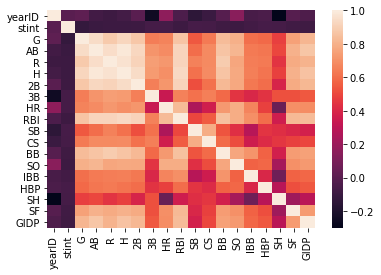

In [130]:
# Heatmap of Batting dataset
_ = sns.heatmap(batting.corr())

### Pitching Data

The pitching dataset will be used to evaluate pitchers and determine whehter or not they are All Star level players or HOF level players at the very best. 

In [131]:
# General overview of null values, value type, column names. 
pitching.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44139 entries, 0 to 44138
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  44139 non-null  object 
 1   yearID    44139 non-null  int64  
 2   stint     44139 non-null  int64  
 3   teamID    44139 non-null  object 
 4   lgID      44008 non-null  object 
 5   W         44139 non-null  int64  
 6   L         44139 non-null  int64  
 7   G         44139 non-null  int64  
 8   GS        44139 non-null  int64  
 9   CG        44139 non-null  int64  
 10  SHO       44139 non-null  int64  
 11  SV        44139 non-null  int64  
 12  IPouts    44138 non-null  float64
 13  H         44139 non-null  int64  
 14  ER        44139 non-null  int64  
 15  HR        44139 non-null  int64  
 16  BB        44139 non-null  int64  
 17  SO        44139 non-null  int64  
 18  BAOpp     42614 non-null  float64
 19  ERA       44049 non-null  float64
 20  IBB       29564 non-null  fl

In this dataset, we can see that we have information related to the raw statistics a pitcher has developed over the years. Unfortunately, one issue that is similar to the problems in the batting dataset is that we don't have many advanced pitching metrics. Additionally, the dataset has missinv values for several categories. These include:
* lgid, IPouts, BAOpp, ERA, IBB, WP, HBP, BFP, GF, SH, SF, GIDP
* Some things to note regarding the missing information above:
    * I don't need most of the ID columns other than the playerID columns. IPouts stands for for outs pitched (Innings pitched x3). There's only one missing value, so we could probably drop it or impute. 
    * BAOPP stands for opponent's batting average. This is key statistic measure, we have a few values not present, around 2,000. I'll have to have a closer look at it to determine the best course of action. 
    * ERA stands for earned run average, a key statistic. Imputing values may not be the best choice, values may have to be dropped. 
    * IBB stands for intentional walks. This is missing quite a few values as intentional walks aren't very common. I may have to drop this. 
    * WP stands for wild pitched and doesn't have many missing values. Major league pitchers rarely have issues with control, so I'm not sure this is the best health-check statistic. 
    * HBP has a few missing values. These values probably can't be imputed as they would contribute to ER earned runs most likely. 
    * GF used to be a key statistic, but nowadays most teams don't let their players pitch a complete game over durability concerns. Can probably be dropped. 
    * SH sacrifices by opposing batters, is a pretty meaningly statistic. Can be dropped. 
    * GIDP grounded into double plays by opposing batters has some value, but there are way too many values to impute. Can be dropped. 
    

In [132]:
pitching.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


Similar to the batting columns come from the year 1851, way too early. Will have to filter the data and then refine after that. 

In [133]:
pitching.tail()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
44134,youngch03,2015,1,KCA,AL,11,6,34,18,0,...,0.0,5.0,0.0,0,500.0,3.0,44,4.0,2.0,NaN
44135,zieglbr01,2015,1,ARI,NL,0,3,66,0,0,...,3.0,2.0,1.0,0,263.0,46.0,17,1.0,0.0,NaN
44136,zimmejo02,2015,1,WAS,NL,13,10,33,33,0,...,3.0,2.0,8.0,1,831.0,0.0,89,8.0,2.0,NaN
44137,zitoba01,2015,1,OAK,AL,0,0,3,2,0,...,0.0,0.0,0.0,0,37.0,1.0,8,0.0,0.0,NaN
44138,zychto01,2015,1,SEA,AL,0,0,13,1,0,...,0.0,1.0,2.0,0,76.0,4.0,6,0.0,0.0,NaN


In terms of keeping the information current or relevant, I should probably go for time periods for the last two years starting from 2015. So we'll do 2013 to 2015. After filtering for this information, then we'll clean the data. 

In [134]:
pitching.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,44139.000000,44139.00000,44139.000000,44139.000000,44139.000000,44139.000000,44139.000000,44139.00000,44139.000000,44138.000000,...,29564.000000,44006.000000,43580.000000,44139.000000,43900.000000,44006.000000,44139.000000,11239.000000,11239.000000,745.000000
mean,1967.786493,1.07925,4.748794,4.748771,23.667142,9.552550,3.207979,0.45615,1.503976,255.673886,...,2.447064,2.534836,2.271111,0.303881,345.551572,6.355611,43.332291,2.207759,1.908088,4.844295
std,37.352599,0.28443,5.837989,5.007080,18.462900,12.312479,7.134955,1.11821,4.971535,258.428826,...,2.792671,3.438515,3.008115,0.759298,350.259188,10.003279,43.437952,2.751917,2.143002,5.524863
min,1871.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1940.000000,1.00000,0.000000,1.000000,7.000000,0.000000,0.000000,0.00000,0.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,64.000000,0.000000,11.000000,0.000000,0.000000,1.000000
50%,1977.000000,1.00000,2.000000,3.000000,22.000000,3.000000,0.000000,0.00000,0.000000,169.000000,...,2.000000,1.000000,1.000000,0.000000,229.000000,3.000000,29.000000,1.000000,1.000000,3.000000
75%,2000.000000,1.00000,7.000000,8.000000,35.000000,18.000000,3.000000,0.00000,1.000000,397.000000,...,4.000000,4.000000,3.000000,0.000000,540.000000,8.000000,68.000000,3.000000,3.000000,7.000000
max,2015.000000,4.00000,59.000000,48.000000,106.000000,75.000000,75.000000,16.00000,62.000000,2040.000000,...,23.000000,63.000000,41.000000,16.000000,2906.000000,84.000000,519.000000,21.000000,14.000000,36.000000


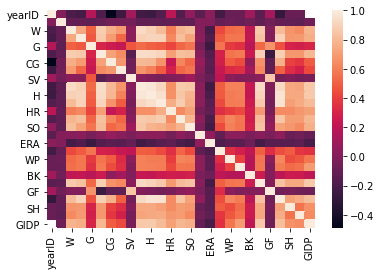

In [135]:
# Heatmap of Pitching dataset
_ = sns.heatmap(pitching.corr())

### All-Star Data

In [136]:
all_star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5069 entries, 0 to 5068
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   playerID     5069 non-null   object 
 1   yearID       5069 non-null   int64  
 2   gameNum      5069 non-null   int64  
 3   gameID       5020 non-null   object 
 4   teamID       5069 non-null   object 
 5   lgID         5069 non-null   object 
 6   GP           5050 non-null   float64
 7   startingPos  1580 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 316.9+ KB


The first thing I notice right away is that the playerID columns are significantly smaller. This makes sense, All-Stars make up a fraction of the players in the league. Additionally, there are null values in:
* gameID, GP, and startingPos.

In [137]:
all_star.head()

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
0,gomezle01,1933,0,ALS193307060,NYA,AL,1.0,1.0
1,ferreri01,1933,0,ALS193307060,BOS,AL,1.0,2.0
2,gehrilo01,1933,0,ALS193307060,NYA,AL,1.0,3.0
3,gehrich01,1933,0,ALS193307060,DET,AL,1.0,4.0
4,dykesji01,1933,0,ALS193307060,CHA,AL,1.0,5.0


In [138]:
all_star.tail()

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
5064,boxbebr01,2015,0,NLS201507155,TBA,AL,NaN,NaN
5065,gordoal01,2015,0,NLS201507156,KCA,AL,NaN,NaN
5066,herreke01,2015,0,NLS201507157,KCA,AL,NaN,NaN
5067,cabremi01,2015,0,NLS201507158,DET,AL,NaN,NaN
5068,salech01,2015,0,NLS201507159,CHA,AL,NaN,NaN


It looks like all_star information dates back from 1933 until 2015. We are interested in the time period 2013-2015. 

In [139]:
all_star.describe()

,yearID,gameNum,GP,startingPos
count,5069.000000,5069.000000,5050.000000,1580.000000
mean,1976.433024,0.136911,0.778218,5.037975
std,23.693503,0.461412,0.415486,2.653486
min,1933.000000,0.000000,0.000000,0.000000
25%,1958.000000,0.000000,1.000000,3.000000
50%,1976.000000,0.000000,1.000000,5.000000
75%,1998.000000,0.000000,1.000000,7.000000
max,2015.000000,2.000000,1.000000,10.000000


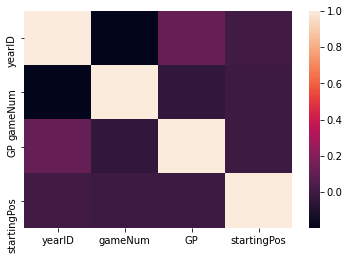

In [140]:
# All-Star heatmap
_ = sns.heatmap(all_star.corr())

There isn't really any statistically important information in this table. It just indicates whether or not a player was an all star. 

### Master Dataset
This dataset will tell a little more about the player. It will give information about the player's age, data of birth, height, weight, etc. 


In [141]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      18846 non-null  object 
 1   birthYear     18703 non-null  float64
 2   birthMonth    18531 non-null  float64
 3   birthDay      18382 non-null  float64
 4   birthCountry  18773 non-null  object 
 5   birthState    18220 non-null  object 
 6   birthCity     18647 non-null  object 
 7   deathYear     9336 non-null   float64
 8   deathMonth    9335 non-null   float64
 9   deathDay      9334 non-null   float64
 10  deathCountry  9329 non-null   object 
 11  deathState    9277 non-null   object 
 12  deathCity     9325 non-null   object 
 13  nameFirst     18807 non-null  object 
 14  nameLast      18846 non-null  object 
 15  nameGiven     18807 non-null  object 
 16  weight        17975 non-null  float64
 17  height        18041 non-null  float64
 18  bats          17655 non-nu

I'm going to try and use some of the information from thhis table and join it with other datasets. The main things that I'm curious about are body player attributes. These are weight, height, bats, throws. 

In [142]:
master.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [143]:
master.tail()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
18841,zupofr01,1939.0,8.0,29.0,USA,CA,San Francisco,2005.0,3.0,25.0,...,Zupo,Frank Joseph,182.0,71.0,L,R,1957-07-01,1961-05-09,zupof101,zupofr01
18842,zuvelpa01,1958.0,10.0,31.0,USA,CA,San Mateo,NaN,NaN,NaN,...,Zuvella,Paul,173.0,72.0,R,R,1982-09-04,1991-05-02,zuvep001,zuvelpa01
18843,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,...,Zuverink,George,195.0,76.0,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01
18844,zwilldu01,1888.0,11.0,2.0,USA,MO,St. Louis,1978.0,3.0,27.0,...,Zwilling,Edward Harrison,160.0,66.0,L,L,1910-08-14,1916-07-12,zwild101,zwilldu01
18845,zychto01,1990.0,8.0,7.0,USA,IL,Monee,NaN,NaN,NaN,...,Zych,Anthony Aaron,190.0,75.0,R,R,2015-09-04,2015-10-03,zycht001,zychto01


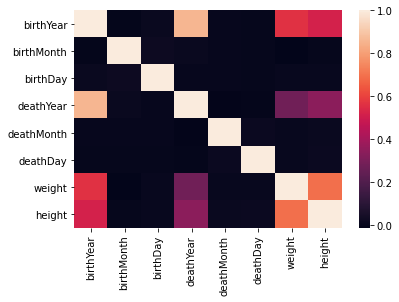

In [144]:
# Master Dataset Heatmap
_ = sns.heatmap(master.corr())

I'm. not really too interested in how this information correlates together. I want to see how it correlates, when I join it with another dataset later on.

### Team Dataset
This dataset will be used to predict how many games a team might win based on the various statistics they accrue over the season. Machine

In [145]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          2805 non-null   int64  
 1   lgID            2755 non-null   object 
 2   teamID          2805 non-null   object 
 3   franchID        2805 non-null   object 
 4   divID           1288 non-null   object 
 5   Rank            2805 non-null   int64  
 6   G               2805 non-null   int64  
 7   Ghome           2406 non-null   float64
 8   W               2805 non-null   int64  
 9   L               2805 non-null   int64  
 10  DivWin          1260 non-null   object 
 11  WCWin           624 non-null    object 
 12  LgWin           2777 non-null   object 
 13  WSWin           2448 non-null   object 
 14  R               2805 non-null   int64  
 15  AB              2805 non-null   int64  
 16  H               2805 non-null   int64  
 17  2B              2805 non-null   i

This dataset is quite large in comparison to the others. I'm obviously going to drop a lot of information, but this will be the primary dataset I use for Machine Learning. I'm going to try and make predictions on wins based on the various statistical data available to me. 

As for values, that I'll need to drop. I want to have a further look at the heatmap first before making that choice. 

In [146]:
team.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [147]:
team.tail()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2800,2015,NL,LAN,LAD,W,1,162,81.0,92,70,...,133.0,0.988,Los Angeles Dodgers,Dodger Stadium,3764815.0,101,98,LAD,LAN,LAN
2801,2015,NL,SFN,SFG,W,2,162,81.0,84,78,...,145.0,0.987,San Francisco Giants,AT&T Park,3375882.0,99,97,SFG,SFN,SFN
2802,2015,NL,ARI,ARI,W,3,162,81.0,79,83,...,146.0,0.986,Arizona Diamondbacks,Chase Field,2080145.0,107,106,ARI,ARI,ARI
2803,2015,NL,SDN,SDP,W,4,162,81.0,74,88,...,138.0,0.985,San Diego Padres,Petco Park,2459742.0,98,97,SDP,SDN,SDN
2804,2015,NL,COL,COL,W,5,162,81.0,68,94,...,171.0,0.985,Colorado Rockies,Coors Field,2506789.0,119,118,COL,COL,COL


Again, a lot of this information goes back way beyond dates that I want. I'll want to filter the data so that it'll be going back to the last three years. 

In [148]:
team.describe()

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,...,HA,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF
count,2805.000000,2805.000000,2805.00000,2406.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,...,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2488.000000,2805.000000,2.526000e+03,2805.000000,2805.000000
mean,1955.036720,4.107308,150.34795,78.465919,74.749020,74.749020,681.945811,5142.492335,1346.273440,227.624955,...,1346.083779,101.136542,474.010695,731.229234,186.337255,140.186495,0.961519,1.344346e+06,100.199643,100.225668
std,41.519083,2.323414,23.22725,4.698684,17.640402,17.378079,135.738244,750.551691,219.891603,58.692602,...,219.521064,58.245002,131.890032,296.409881,107.657444,29.322764,0.030224,9.469316e+05,4.882215,4.814985
min,1871.000000,1.000000,6.00000,44.000000,0.000000,4.000000,24.000000,211.000000,33.000000,3.000000,...,49.000000,0.000000,0.000000,0.000000,47.000000,18.000000,0.760000,6.088000e+03,60.000000,60.000000
25%,1919.000000,2.000000,153.00000,77.000000,66.000000,65.000000,613.000000,5127.000000,1299.000000,193.000000,...,1288.000000,46.000000,427.000000,501.000000,116.000000,126.000000,0.960000,5.287162e+05,97.000000,97.000000
50%,1963.000000,4.000000,157.00000,81.000000,77.000000,76.000000,690.000000,5389.000000,1393.000000,231.000000,...,1392.000000,109.000000,494.000000,735.000000,145.000000,145.000000,0.970000,1.140348e+06,100.000000,100.000000
75%,1992.000000,6.000000,162.00000,81.000000,87.000000,87.000000,763.000000,5517.000000,1467.000000,270.000000,...,1470.000000,148.000000,555.000000,965.000000,217.000000,159.250000,0.980000,2.014687e+06,103.000000,103.000000
max,2015.000000,13.000000,165.00000,84.000000,116.000000,134.000000,1220.000000,5781.000000,1783.000000,376.000000,...,1993.000000,241.000000,827.000000,1450.000000,639.000000,217.000000,0.991000,4.483350e+06,129.000000,141.000000


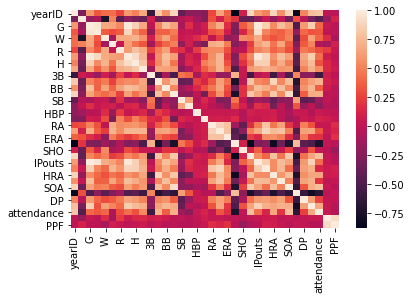

In [149]:
_ = sns.heatmap(team.corr())

Specifically, looking at the W table which stands for wins, I'm looking for information that isn't too weakly correlated to that value. However, one of the main issues right now is that all of the attributes can't really be presented with the current correlation matrix. 

### HOF Dataset
This dataset will be used to make prediction for a machine learning algorithm. I want to know, if based on a player's statistics how likely they are to be voted into the hall of fame?

In [150]:
hof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   playerID     4120 non-null   object 
 1   yearid       4120 non-null   int64  
 2   votedBy      4120 non-null   object 
 3   ballots      3927 non-null   float64
 4   needed       3770 non-null   float64
 5   votes        3927 non-null   float64
 6   inducted     4120 non-null   object 
 7   category     4120 non-null   object 
 8   needed_note  157 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 289.8+ KB


In [151]:
hof.head()

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN


In [152]:
hof.tail()

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
4115,grudzma01,2016,BBWAA,440.0,330.0,0.0,N,Player,NaN
4116,ausmubr01,2016,BBWAA,440.0,330.0,0.0,N,Player,NaN
4117,hamptmi01,2016,BBWAA,440.0,330.0,0.0,N,Player,NaN
4118,castilu01,2016,BBWAA,440.0,330.0,0.0,N,Player,NaN
4119,lowelmi01,2016,BBWAA,440.0,330.0,0.0,N,Player,NaN


In [153]:
hof.describe()

,yearid,ballots,needed,votes
count,4120.000000,3927.000000,3770.000000,3927.000000
mean,1968.889563,320.705373,243.989920,50.995926
std,22.899162,125.495156,94.557016,84.845195
min,1936.000000,78.000000,59.000000,0.000000
25%,1950.000000,226.000000,175.000000,2.000000
50%,1964.000000,274.000000,213.000000,10.000000
75%,1987.000000,425.000000,321.000000,64.000000
max,2016.000000,581.000000,436.000000,555.000000


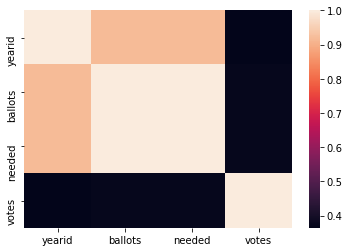

In [154]:
_ = sns.heatmap(hof.corr())

As we can see, there's not much going on with this set. I'll have a look at this one later. Somethings to note about the dataset are the missing values. There are missing values for:
* ballots, needed, votes, and needed_note. 

This data will be used later, but I will most likely need to keep all of this information. 

### EDA Update

After looking at each of the files raw, I have some cleaning to do. Initially, I stated that I was going to removed the id information columns, but upon further inspection of all of the data, It looks like that information will be needed to perform joins between some of the tables. Next, up in the project will be data cleaning. 

### Data Cleaning

#### Batting Dataset

I'm not really sure, if I will need the leagueID column. What I will do first to get started is filter data based on the year. As I mentioned before, I'm interested in current data from 2013-2015. 

In [169]:
# Filtering Batting Data
batting_recent = batting[["yearID"]] > 2013



,yearID
0,False
1,False
2,False
3,False
4,False
...,...
101327,True
101328,True
101329,True
101330,True
